In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url = "https://fbref.com/en/comps/9/1631/2017-2018-Premier-League-Stats.html"
page = urlopen(url).read()

soup = BeautifulSoup(page)
count = 0
##highlight the website data right click and hit inspect
table = soup.find("tbody")


table = soup.find("tbody")
pre_df = dict()
features_wanted = {'rank','squad','games','wins','draws','losses','goals_for','goals_against','goal_diff','points',
                   'attendance_per_g'}

rows = table.find_all('tr')
for row in rows:
    if (row.find('th', {"scope":"row"}) != None):
        
        for f in features_wanted:
            cell = row.find("td",{"data-stat": f})
            
            if cell != None:
                a = cell.text.strip().encode()
                text = a.decode("utf-8")
                if f in pre_df:
                    pre_df[f].append(text)
                else:
                    pre_df[f] = [text]
        
                df = pd.DataFrame.from_dict(pre_df, orient = 'index')
                df =df.transpose()

df['year'] = 2017
df['rank'] = np.arange(len(df))
df["rank"] = pd.to_numeric(df["rank"])
df["games"] = pd.to_numeric(df["games"])
df["wins"] = pd.to_numeric(df["wins"])
df["winsperc"] = (df["wins"] / df["games"])
df["rank"] += 1
df.rename(columns={'squad': 'Team', 'year': 'Year'}, inplace=True)
df_squad2017 = df[['Year','rank','Team','games','wins','draws','losses','goals_for','goals_against','goal_diff','points',
                   'attendance_per_g','winsperc']]
df_squad2017wins = df_squad2017[['Year','Team','winsperc']]

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url = "https://fbref.com/en/comps/9/1889/2018-2019-Premier-League-Stats.html"
page = urlopen(url).read()

soup = BeautifulSoup(page)
count = 0
##highlight the website data right click and hit inspect
table = soup.find("tbody")


table = soup.find("tbody")
pre_df = dict()
features_wanted = {'rank','squad','games','wins','draws','losses','goals_for','goals_against','goal_diff','points',
                   'attendance_per_g'}

rows = table.find_all('tr')
for row in rows:
    if (row.find('th', {"scope":"row"}) != None):
        
        for f in features_wanted:
            cell = row.find("td",{"data-stat": f})
            
            if cell != None:
                a = cell.text.strip().encode()
                text = a.decode("utf-8")
                if f in pre_df:
                    pre_df[f].append(text)
                else:
                    pre_df[f] = [text]
        
                df = pd.DataFrame.from_dict(pre_df, orient = 'index')
                df =df.transpose()

df['year'] = 2018
df['rank'] = np.arange(len(df))
df["rank"] = pd.to_numeric(df["rank"])
df["games"] = pd.to_numeric(df["games"])
df["wins"] = pd.to_numeric(df["wins"])
df["winsperc"] = (df["wins"] / df["games"])
df["rank"] += 1
df.rename(columns={'squad': 'Team', 'year': 'Year'}, inplace=True)
df_squad2018 = df[['Year','rank','Team','games','wins','draws','losses','goals_for','goals_against','goal_diff','points',
                   'attendance_per_g','winsperc']]
df_squad2018wins = df_squad2018[['Year','Team','winsperc']]

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url = "https://fbref.com/en/comps/9/3232/2019-2020-Premier-League-Stats.html"
page = urlopen(url).read()

soup = BeautifulSoup(page)
count = 0
##highlight the website data right click and hit inspect
table = soup.find("tbody")


table = soup.find("tbody")
pre_df = dict()
features_wanted = {'rank','squad','games','wins','draws','losses','goals_for','goals_against','goal_diff','points',
                   'attendance_per_g'}

rows = table.find_all('tr')
for row in rows:
    if (row.find('th', {"scope":"row"}) != None):
        
        for f in features_wanted:
            cell = row.find("td",{"data-stat": f})
            
            if cell != None:
                a = cell.text.strip().encode()
                text = a.decode("utf-8")
                if f in pre_df:
                    pre_df[f].append(text)
                else:
                    pre_df[f] = [text]
        
                df = pd.DataFrame.from_dict(pre_df, orient = 'index')
                df =df.transpose()

df['year'] = 2019
df['rank'] = np.arange(len(df))
df["rank"] = pd.to_numeric(df["rank"])
df["games"] = pd.to_numeric(df["games"])
df["wins"] = pd.to_numeric(df["wins"])
df["winsperc"] = (df["wins"] / df["games"])
df["rank"] += 1
df.rename(columns={'squad': 'Team', 'year': 'Year'}, inplace=True)
df_squad2019 = df[['Year','rank','Team','games','wins','draws','losses','goals_for','goals_against','goal_diff','points',
                   'attendance_per_g','winsperc']]
df_squad2019wins = df_squad2019[['Year','Team','winsperc']]

In [4]:
df_squad2017_2019wins = pd.concat([df_squad2017wins,df_squad2018wins,df_squad2019wins]) 

In [5]:
df_squad2017_2019wins.Team.unique()

array(['Manchester City', 'Manchester Utd', 'Tottenham', 'Liverpool',
       'Chelsea', 'Arsenal', 'Burnley', 'Everton', 'Leicester City',
       'Newcastle Utd', 'Crystal Palace', 'Bournemouth', 'West Ham',
       'Watford', 'Brighton', 'Huddersfield', 'Southampton',
       'Swansea City', 'Stoke City', 'West Brom', 'Wolves',
       'Cardiff City', 'Fulham', 'Sheffield Utd', 'Aston Villa',
       'Norwich City'], dtype=object)

In [6]:
df_squad2017_2019wins['Team'] = df_squad2017_2019wins['Team'].replace(['Manchester City', 
'Arsenal', 
'Aston Villa',
'Brighton',
'Burnley', 
'Chelsea', 
'Crystal Palace', 
'Everton', 
'Fulham', 
'Leicester City',
'Liverpool',
'Manchester Utd', 
'Newcastle Utd', 
'Sheffield Utd', 
'Southampton',
'Tottenham', 
'West Brom', 
'West Ham',
'Wolves'],['manchester City Fc', 
'arsenal Fc', 
'aston Villa Fc', 
'brighton Hove Albion',
'burnley Fc', 
'chelsea Fc', 
'crystal Palace', 
'everton Fc',
'fulham Fc', 
'leicester City', 
'liverpool Fc',
'manchester United Fc',
'newcastle United Fc', 
'sheffield United Fc', 
'southampton Fc',
'tottenham Hotspur Fc', 
'west Bromwich Albion Fc',
'west Ham United Fc', 
'wolverhampton Wanderers Fc'])

In [7]:
df_payroll2017 = pd.read_csv('2017_2018Payroll.csv', encoding='latin-1')
df_payroll2018 = pd.read_csv('2018_2019Payroll.csv', encoding='latin-1')
df_payroll2019 = pd.read_csv('2019_2020Payroll.csv', encoding='latin-1')

In [10]:
df_squad2017_2019payroll = pd.concat([df_payroll2017,df_payroll2018,df_payroll2019]) 
df_payroll2019.fillna(0)
df_payroll2019.Team.unique()

array(['arsenal Fc', 'aston Villa Fc', 'brighton Hove Albion',
       'burnley Fc', 'chelsea Fc', 'crystal Palace', 'everton Fc',
       'fulham Fc', 'leeds United Fc', 'leicester City', 'liverpool Fc',
       'manchester City Fc', 'manchester United Fc',
       'newcastle United Fc', 'sheffield United Fc', 'southampton Fc',
       'tottenham Hotspur Fc', 'west Bromwich Albion Fc',
       'west Ham United Fc', 'wolverhampton Wanderers Fc'], dtype=object)

In [11]:
df_squad2017_2019payroll = df_squad2017_2019payroll[['Year','Team','Base.Num']]
df_squad2017_2019payroll.rename(columns = {'Year' : 'Year', 'Base.Num' : 'Salary'}, inplace = True)


In [12]:
df_squad2017_2019payroll.head()

,Year,Team,Salary
0,2017,arsenal Fc,9.467273
1,2017,arsenal Fc,9.100000
2,2017,arsenal Fc,7.280000
3,2017,arsenal Fc,6.500000
4,2017,arsenal Fc,6.240000


In [13]:
df_squad2017_2019Group = df_squad2017_2019payroll.groupby(['Year','Team']).Salary.sum().reset_index()

In [14]:
df_squad2017_2019Group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    60 non-null     int64  
 1   Team    60 non-null     object 
 2   Salary  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


In [15]:
df_squad2017_2019wins.head()

,Year,Team,winsperc
0,2017,manchester City Fc,0.842105
1,2017,manchester United Fc,0.657895
2,2017,tottenham Hotspur Fc,0.605263
3,2017,liverpool Fc,0.552632
4,2017,chelsea Fc,0.552632


In [16]:
SalaryWins = pd.merge(df_squad2017_2019wins, df_squad2017_2019Group)

In [17]:
SalaryWins['Team'] = SalaryWins['Team'].replace(['manchester City Fc', 
'arsenal Fc', 
'aston Villa Fc', 
'brighton Hove Albion',
'burnley Fc', 
'chelsea Fc', 
'crystal Palace', 
'everton Fc',
'fulham Fc', 
'leicester City', 
'liverpool Fc',
'manchester United Fc',
'newcastle United Fc', 
'sheffield United Fc', 
'southampton Fc',
'tottenham Hotspur Fc', 
'west Bromwich Albion Fc',
'west Ham United Fc', 
'wolverhampton Wanderers Fc'],['ManC', 
'Ars', 
'AstV',
'Bright',
'Burn', 
'Chels', 
'CrystP', 
'Ever', 
'Fulh', 
'LeicC',
'Liverp',
'ManU', 
'NewU', 
'ShefU', 
'Southam',
'Tott', 
'WestBrom', 
'WestHam',
'Wolves'])

In [18]:
SalaryWins.head()

,Year,Team,winsperc,Salary
0,2017,ManC,0.842105,126.490
1,2017,ManU,0.657895,135.720
2,2017,Tott,0.605263,78.988
3,2017,Liverp,0.552632,86.824
4,2017,Chels,0.552632,117.792


In [19]:
SalaryWins.to_csv('SalaryWins.csv')

In [20]:
SalaryWins2017 = SalaryWins.loc[SalaryWins['Year'] == 2017]
SalaryWins2017.fillna(0)

SalaryWins2018 = SalaryWins.loc[SalaryWins['Year'] == 2018]
SalaryWins2018.fillna(0)

SalaryWins2019 = SalaryWins.loc[SalaryWins['Year'] == 2019]
SalaryWins2019.fillna(0)

,Year,Team,winsperc,Salary
31,2019,Liverp,0.842105,128.160000
32,2019,ManC,0.684211,146.521000
33,2019,ManU,0.473684,157.595000
34,2019,Chels,0.526316,121.290000
35,2019,LeicC,0.473684,75.469000
36,2019,Tott,0.421053,90.138000
37,2019,Wolves,0.394737,48.901000
38,2019,Ars,0.368421,111.666273
39,2019,ShefU,0.368421,16.572000
40,2019,Burn,0.394737,48.604000


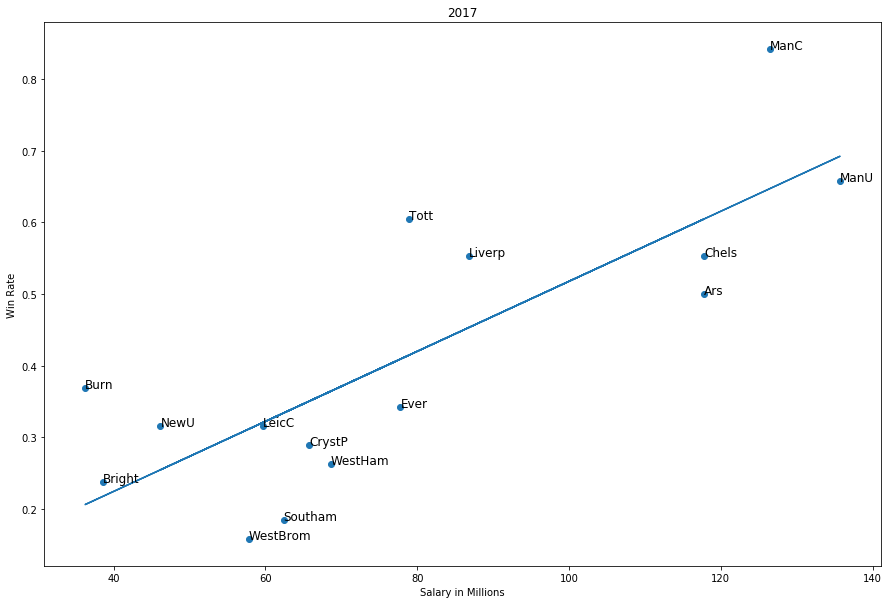

In [23]:
import numpy as np 
import matplotlib.pyplot as plt

group_names = [2017]
for Year in group_names:
    # Computing average total payroll and win rate for each team per period
    s = SalaryWins2017
    a = s.pivot(index='Year', columns='Team', values='Salary')
    b = s.pivot(index='Year', columns='Team', values='winsperc')
    x_data = a.mean().values
    y_data = b.mean().values
    # Making a scatter plot and drawing a regression line 
    fit = np.polyfit(x = x_data,y = y_data,deg = 1)
    plt.figure(figsize = (15,10))
    plt.plot(x_data, fit[0] * x_data + fit[1])
    plt.scatter(x_data, y_data)
    a = a.transpose()
    # annotate each point with its team name.
    for i, txt in enumerate(a.index):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    plt.xlabel("Salary in Millions")
    plt.ylabel("Win Rate")
    plt.title(Year)
    plt.show()

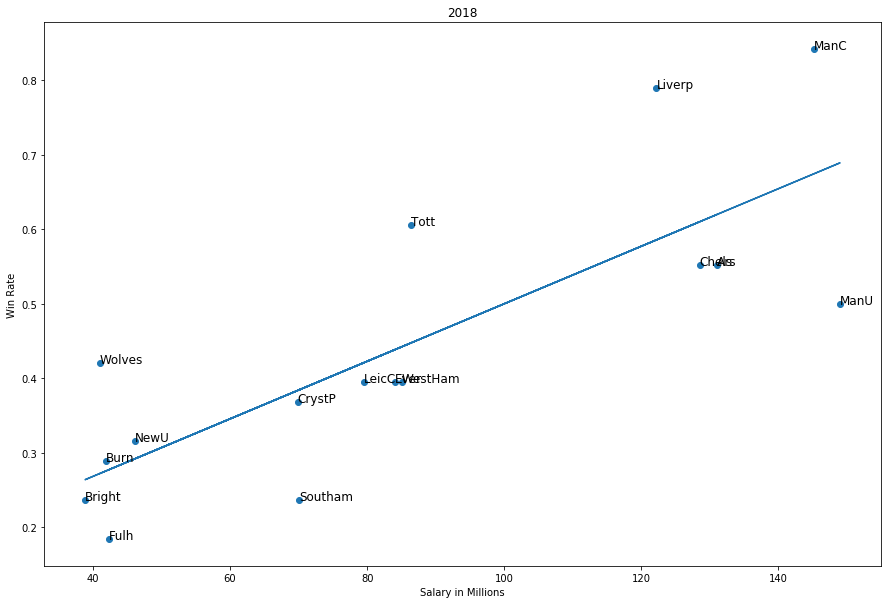

In [24]:
group_names = [2018]
for Year in group_names:
    # Computing average total payroll and win rate for each team per period
    s = SalaryWins2018
    a = s.pivot(index='Year', columns='Team', values='Salary')
    b = s.pivot(index='Year', columns='Team', values='winsperc')
    x_data = a.mean().values
    y_data = b.mean().values
    # Making a scatter plot and drawing a regression line 
    fit = np.polyfit(x = x_data,y = y_data,deg = 1)
    plt.figure(figsize = (15,10))
    plt.plot(x_data, fit[0] * x_data + fit[1])
    plt.scatter(x_data, y_data)
    a = a.transpose()
    # annotate each point with its team name.
    for i, txt in enumerate(a.index):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    plt.xlabel("Salary in Millions")
    plt.ylabel("Win Rate")
    plt.title(Year)
    plt.show()

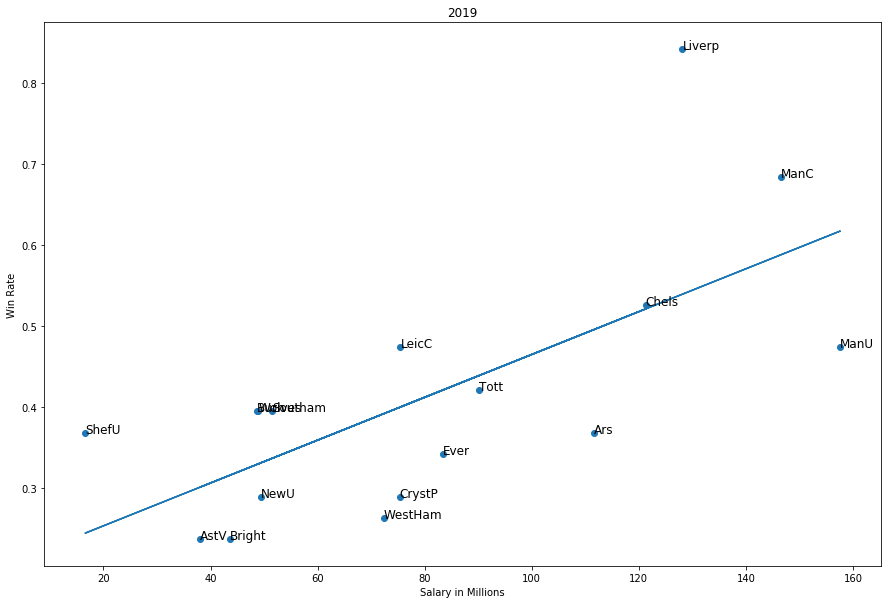

In [25]:
group_names = [2019]
for Year in group_names:
    # Computing average total payroll and win rate for each team per period
    s = SalaryWins2019
    a = s.pivot(index='Year', columns='Team', values='Salary')
    b = s.pivot(index='Year', columns='Team', values='winsperc')
    x_data = a.mean().values
    y_data = b.mean().values
    # Making a scatter plot and drawing a regression line 
    fit = np.polyfit(x = x_data,y = y_data,deg = 1)
    plt.figure(figsize = (15,10))
    plt.plot(x_data, fit[0] * x_data + fit[1])
    plt.scatter(x_data, y_data)
    a = a.transpose()
    # annotate each point with its team name.
    for i, txt in enumerate(a.index):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    plt.xlabel("Salary in Millions")
    plt.ylabel("Win Rate")
    plt.title(Year)
    plt.show()